In [2]:
from TCC import carregar_filmes, carregar_avaliacoes
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#Carregar dados
filmes = carregar_filmes('./Datasets/ml-latest-small/movies.csv')
dados = carregar_avaliacoes('./Datasets/ml-latest-small/ratings.csv')

In [3]:
#analisando as estatisticas dos dados
dados.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [4]:
#verificando se existe id nulos ou avalaições nulas
print(dados['userId'].isnull().values.sum())
print(dados['movieId'].isnull().values.sum())
print(dados['rating'].isnull().values.sum())

0
0
0


In [5]:
dados[dados.duplicated(keep=False)]

,userId,movieId,rating,timestamp


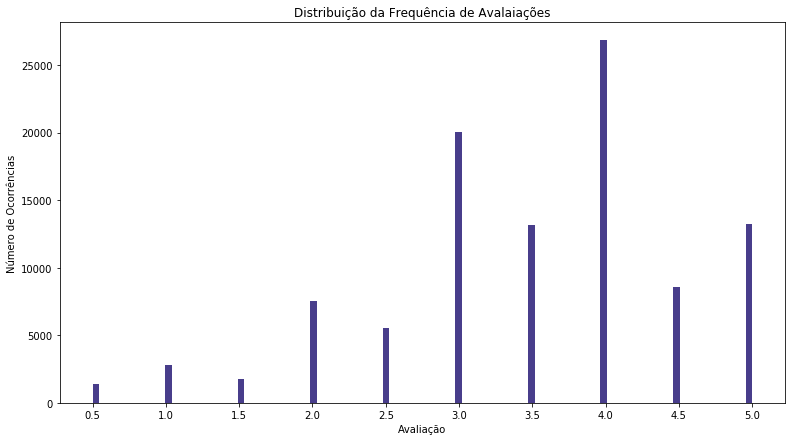

In [6]:
#Plotando gráfico que mostra a quantidade de avaliações agregada pelo valor da avaliação
dados['rating'].plot(kind='hist', 
              figsize=(13,7),
              bins=100,
              color='darkslateblue'
              )

plt.title('Distribuição da Frequência de Avalaiações')
plt.xlabel('Avaliação')
plt.ylabel('Número de Ocorrências')
plt.xticks([0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.show()

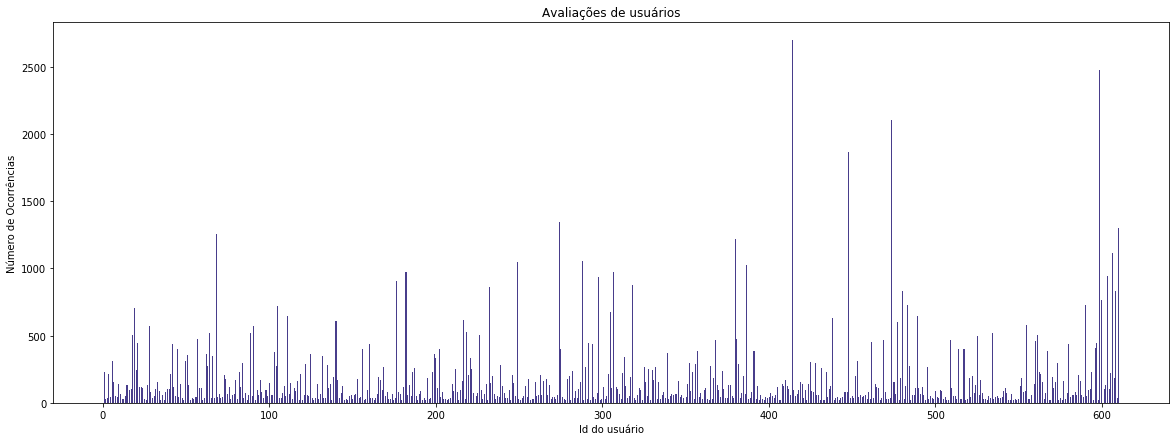

In [7]:
#Plotando gráfico que mostra quantas avaliações cada usuário realizou
dados['userId'].plot(kind='hist', 
              figsize=(20,7),
              bins=1000,
              color='darkslateblue'
              )

plt.title('Avaliações de usuários')
plt.xlabel('Id do usuário')
plt.ylabel('Número de Ocorrências')
plt.show()

In [54]:
#Mostrando usuários que realizaram mais de 1000 avaliações
dados['userId'].value_counts()[dados['userId'].value_counts() > 1000].index

Int64Index([414, 599, 474, 448, 274, 610, 68, 380, 606, 288, 249, 387], dtype='int64')

In [59]:
dados_modificados = sub_df = dados[dados.groupby('userId').userId.transform('count')<1000].copy()

In [60]:
#analisando as estatisticas dos dados modificados
dados_modificados.describe()

,userId,movieId,rating,timestamp
count,82319.000000,82319.000000,82319.000000,8.231900e+04
mean,304.921877,18199.425770,3.554410,1.196738e+09
std,182.832201,34648.031397,1.058603,2.198885e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,141.000000,1077.500000,3.000000,9.909098e+08
50%,304.000000,2713.000000,4.000000,1.186172e+09
75%,476.000000,7119.500000,4.000000,1.435525e+09
max,609.000000,193609.000000,5.000000,1.537799e+09


In [63]:
#verificando se existe id nulos ou avalaições nulas
print(dados_modificados['userId'].isnull().values.sum())
print(dados_modificados['movieId'].isnull().values.sum())
print(dados_modificados['rating'].isnull().values.sum())

0
0
0


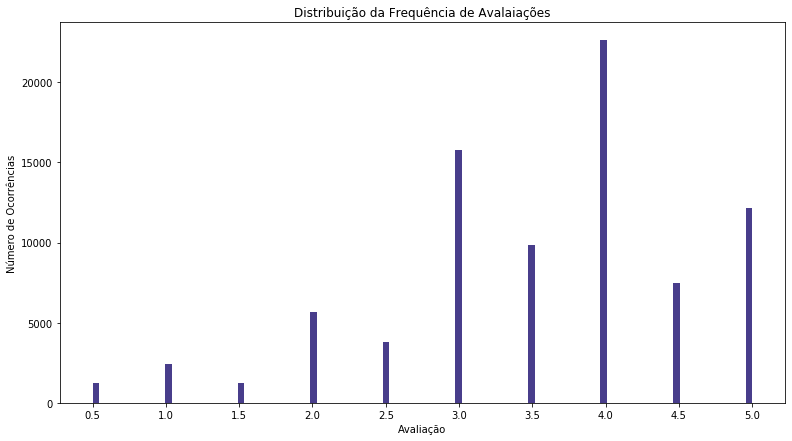

In [64]:
#Plotando gráfico que mostra a quantidade de avaliações agregada pelo valor da avaliação
dados_modificados['rating'].plot(kind='hist', 
              figsize=(13,7),
              bins=100,
              color='darkslateblue'
              )

plt.title('Distribuição da Frequência de Avalaiações')
plt.xlabel('Avaliação')
plt.ylabel('Número de Ocorrências')
plt.xticks([0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.show()

In [48]:
#Analisando estatística da base de filmes
filmes.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [50]:
# Verificando se tem filme com Id nulo
filmes['movieId'].isnull().values.sum()

0

In [1]:
from TCC import carregar_dataset, rodar_modelo, rodar_modelo_sem_teste, prever_avaliacao, encontrar_vizinhos, recomendar_filmes, carregar_filmes, encontrar_detalhes_filmes 

data = carregar_dataset('./Datasets/ml-latest-small/ratings.csv')
knn = rodar_modelo(data, 0.2, {'name': 'msd', 'user_based': True}, 50)
lista_filmes = carregar_filmes('./Datasets/ml-latest-small/movies.csv')

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9512


In [20]:
from TCC import carregar_dataset, rodar_modelo, rodar_modelo_sem_teste, prever_avaliacao, encontrar_vizinhos, recomendar_filmes, carregar_filmes, encontrar_detalhes_filmes 

data = carregar_dataset('./Datasets/ml-latest-small/ratings_mod.csv')
knn = rodar_modelo_sem_teste(data, {'name': 'msd', 'user_based': True}, 50)
lista_filmes = carregar_filmes('./Datasets/ml-latest-small/movies.csv')

Computing the msd similarity matrix...
Done computing similarity matrix.


In [21]:
predicao = prever_avaliacao(knn, 232,46970, True)

user: 232        item: 46970      r_ui = None   est = 3.27   {'actual_k': 28, 'was_impossible': False}


In [22]:
print(encontrar_vizinhos(knn,474, 5))

[43, 86, 119, 326, 374]


In [30]:
recomendacoes = recomendar_filmes(knn, data, 611, 10)

Montando base...
Encontrando filmes não avaliados...
Avaliando filmes...
Previsões realizadas. Recomendados 10 filmes.


In [31]:
encontrar_detalhes_filmes(lista_filmes, recomendacoes.transpose()[0])

,movieId,title,genres
421,484,Lassie (1994),Adventure|Children
870,1151,Lesson Faust (1994),Animation|Comedy|Drama|Fantasy
2880,3851,I'm the One That I Want (2000),Comedy
4110,5890,Elling (2001),Comedy|Drama
5308,8804,"Story of Women (Affaire de femmes, Une) (1988)",Drama
5493,26350,"Passenger, The (Professione: reporter) (1975)",Drama
5654,27523,My Sassy Girl (Yeopgijeogin geunyeo) (2001),Comedy|Romance
6999,67618,Strictly Sexual (2008),Comedy|Drama|Romance
7812,92494,Dylan Moran: Monster (2004),Comedy|Documentary
8154,102217,Bill Hicks: Revelations (1993),Comedy
